<a href="https://colab.research.google.com/github/haasyawafda/ARIMA_Using_Python/blob/main/Analisis_Data_dengan_Metode_ARIMA_Box_Jenkins_ASII.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Analisis data time series dengan metode ARIMA (p,d,q)
#Haasya wafdayanti
#Department of Statistics, Diponegoro University

In [13]:
#Paket yang diperlukan
import pandas as pd
import numpy as np

In [15]:
#Memanggil data sebelumnya data yang sudah di upload pada situs Github.com sebagai berikut:
data=pd.read_csv('https://raw.githubusercontent.com/haasyawafda/ARIMA_Using_Python/main/ASII%202021.csv',sep=';')

#Menampilkan 5 data pertama
data.head()  

,Tanggal,Terakhir
0,01/07/2021,5.025
1,02/07/2021,5.000
2,05/07/2021,4.940
3,06/07/2021,4.900
4,07/07/2021,4.900


In [16]:
#setting Bulan sebagai datetime
data.set_index('Tanggal',inplace=True)

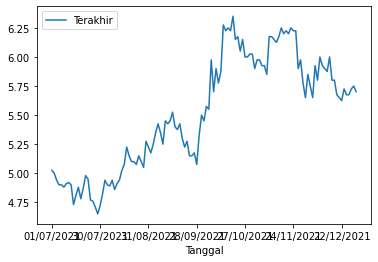

In [17]:
#melakukan plot data
dataarima=data['Terakhir']
data.plot()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


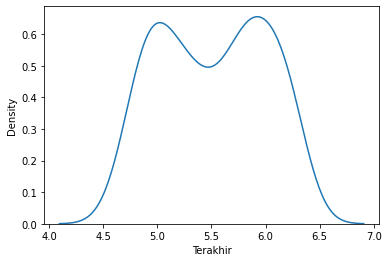

In [18]:
#Uji stasioneritas dalam varian
#Box-Cox Transformation
from scipy.stats import boxcox 
import seaborn as sns

#plot distribusi data
sns.distplot(dataarima, hist=False, kde=True) 

In [19]:
#Box-Cox Transformation
transform_boxcox, best_lambda = boxcox(dataarima) 
#melihat nilai lamda
print(best_lambda)

0.8808017405528714


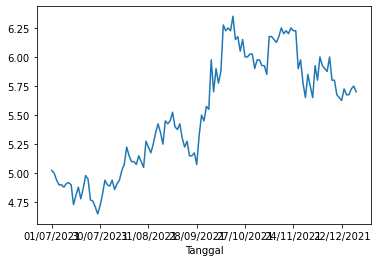

In [20]:
#uji visual stasioneritas dalam mean secara Visual
dataarima.plot()

In [21]:
#Uji stasioneritas dalam mean secara formal
#Augmented Dicky Fuller
from statsmodels.tsa.stattools import adfuller
ADF=adfuller(dataarima)

#Melihat nilai ADF
dict(zip(['adf', 'pvalue', 'usedlag', 'nobs', 'critical' 'values', 'icbest'],ADF))

{'adf': -1.215433665291459,
 'criticalvalues': {'1%': -3.4837793736959997,
  '10%': -2.579256976,
  '5%': -2.88495387648},
 'icbest': -164.44358441667043,
 'nobs': 125,
 'pvalue': 0.6669215519868219,
 'usedlag': 1}

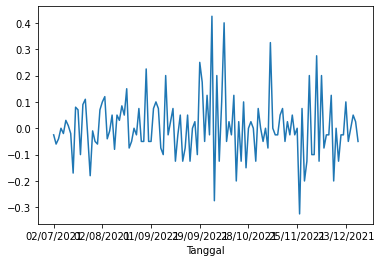

In [22]:
#differencing orde = 1
#uji visual
diff1 = dataarima.diff().dropna()
diff1.plot()

In [23]:
#Uji stasioneritas dalam mean secara Formal
#uji formal
print("p-value:", adfuller(diff1.dropna())[1])

p-value: 5.540914080181394e-28


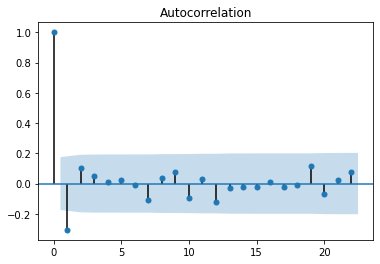

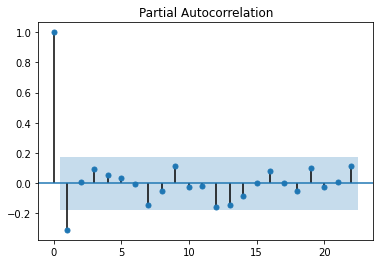

In [24]:

#Plot ACF dan PACF
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
 
ACF=plot_acf(diff1.dropna()) 
PACF=plot_pacf(diff1.dropna())

In [25]:
#paket yang diperlukan
!pip install statsmodels

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [26]:
#ARIMA(1,1,0) ATAU ARI(1,1)
from statsmodels.tsa.arima_model import ARIMA
model1=ARIMA(dataarima,order=(1,1,0))
model1_fit=model1.fit()
print(model1_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:             D.Terakhir   No. Observations:                  126
Model:                 ARIMA(1, 1, 0)   Log Likelihood                  97.675
Method:                       css-mle   S.D. of innovations              0.111
Date:                Sat, 11 Jun 2022   AIC                           -189.349
Time:                        06:15:32   BIC                           -180.841
Sample:                             1   HQIC                          -185.892
                                                                              
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0055      0.008      0.724      0.471      -0.009       0.020
ar.L1.D.Terakhir    -0.3046      0.084     -3.605      0.000      -0.470      -0.139
                            

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [27]:
#ARIMA(0,1,1) ATAU IMA(1,1)
model2=ARIMA(dataarima,order=(0,1,1))
model2_fit=model2.fit()
print(model2_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:             D.Terakhir   No. Observations:                  126
Model:                 ARIMA(0, 1, 1)   Log Likelihood                  96.829
Method:                       css-mle   S.D. of innovations              0.112
Date:                Sat, 11 Jun 2022   AIC                           -187.659
Time:                        06:15:49   BIC                           -179.150
Sample:                             1   HQIC                          -184.202
                                                                              
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0056      0.007      0.752      0.454      -0.009       0.020
ma.L1.D.Terakhir    -0.2617      0.075     -3.495      0.001      -0.408      -0.115
                            

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [28]:
#ARIMA(1,1,1) 
model3=ARIMA(dataarima,order=(1,1,1))
model3_fit=model3.fit()
print(model3_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:             D.Terakhir   No. Observations:                  126
Model:                 ARIMA(1, 1, 1)   Log Likelihood                  97.679
Method:                       css-mle   S.D. of innovations              0.111
Date:                Sat, 11 Jun 2022   AIC                           -187.358
Time:                        06:15:55   BIC                           -176.012
Sample:                             1   HQIC                          -182.748
                                                                              
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0055      0.008      0.719      0.474      -0.010       0.021
ar.L1.D.Terakhir    -0.3236      0.225     -1.439      0.153      -0.764       0.117
ma.L1.D.Terakhir     0.0210 

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [30]:
residual_model1=pd.DataFrame(model1_fit.resid)
residual_model2=pd.DataFrame(model2_fit.resid)
residual_model3=pd.DataFrame(model3_fit.resid)

In [31]:
#Uji Normalitas dg shapiro
#MODEL 1
from scipy.stats import shapiro
shapiro1=shapiro(residual_model1)
dict(zip(['statistic', 'p-value'],shapiro1))

{'p-value': 0.00011271398398093879, 'statistic': 0.9484848976135254}

In [32]:
#MODEL 2
shapiro2=shapiro(residual_model2)
dict(zip(['statistic', 'p-value'],shapiro2))

{'p-value': 0.000177116715349257, 'statistic': 0.9510918259620667}

In [33]:
#MODEL 3
shapiro3=shapiro(residual_model3)
dict(zip(['statistic', 'p-value'],shapiro3))

{'p-value': 0.00011277187149971724, 'statistic': 0.9484879374504089}

In [34]:
#Uji independensi residual
import statsmodels.api as sm
sm.stats.acorr_ljungbox(residual_model1,lags=(12,24,36,48))

(array([ 8.98391794, 18.83454972, 27.77142831, 32.76091414]),
 array([0.70430344, 0.76075457, 0.83524678, 0.95441135]))

In [35]:
#Uji independensi residual
sm.stats.acorr_ljungbox(residual_model2,lags=(12,24,36,48))

(array([10.238133  , 20.59023488, 28.95676513, 33.56875902]),
 array([0.59507812, 0.66276428, 0.79141046, 0.94333882]))

In [36]:
#Uji independensi residual
sm.stats.acorr_ljungbox(residual_model3,lags=(12,24,36,48))

(array([ 8.94911115, 18.77481789, 27.8220034 , 32.85086728]),
 array([0.70727077, 0.76388952, 0.83348385, 0.95326322]))

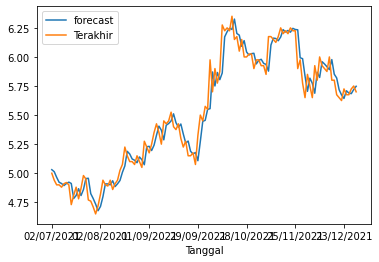

In [37]:
#Plot model terbaik ARIMA(0,1,1) atau IMA(1,1)
# Actual vs Fitted
versus=model2_fit.plot_predict(dynamic=False)

In [38]:
peramalan=model2_fit.forecast(steps=12)
dict(zip(['forecast', 'std.error', 'conf.interval'],peramalan))

{'conf.interval': array([[5.49818568, 5.93789827],
        [5.45031546, 5.99689282],
        [5.41130372, 6.04702888],
        [5.37781596, 6.09164096],
        [5.34819823, 6.13238302],
        [5.32148695, 6.17021863],
        [5.29706236, 6.20576754],
        [5.2744979 , 6.23945633],
        [5.25348515, 6.27159341],
        [5.23379252, 6.30241036],
        [5.21524088, 6.33208632],
        [5.19768828, 6.36076325]]),
 'forecast': array([5.71804198, 5.72360414, 5.7291663 , 5.73472846, 5.74029063,
        5.74585279, 5.75141495, 5.75697711, 5.76253928, 5.76810144,
        5.7736636 , 5.77922577]),
 'std.error': array([0.11217364, 0.13943556, 0.16217776, 0.18210156, 0.20005082,
        0.21651716, 0.23181681, 0.24616739, 0.25972627, 0.2726116 ,
        0.28491479, 0.29670825])}